In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import requests
from bs4 import BeautifulSoup

import re
import time
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV

/Users/zach/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# EXAMPLE: Adding Headers to Requests (To pretend you are not a bot)

headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)'}
url = "http://boxofficemojo.com/movies/?id=biglebowski.htm"
resp = requests.get(url, headers=headers)
if resp.ok:
    soup = BeautifulSoup(resp.text, 'lxml')
with open("biglebowski.html", 'w') as f:
    f.write(resp.text)

In [13]:
df = pd.DataFrame.from_csv('movie_list.csv')

In [14]:
oscar_link_list = {}

#http://www.boxofficemojo.com/oscar/movies/?id=greenlantern.htm

def oscar_list_creator(df):
    base_url = 'http://www.boxofficemojo.com/oscar/movies/?id='
    for i,row in df.iterrows():
        temp_bom_id = row['BOM_ID']
        #print(temp_bom_id)
        temp_url = '{}{}.htm'.format(base_url,temp_bom_id)
        #file_name = 'oscars/{}.html'.format(temp_bom_id)
        oscar_link_list[temp_bom_id] = temp_url

oscar_list_creator(df)
oscar_link_list


{'coraline': 'http://www.boxofficemojo.com/oscar/movies/?id=coraline.htm',
 'ring': 'http://www.boxofficemojo.com/oscar/movies/?id=ring.htm',
 'lemonysnicket': 'http://www.boxofficemojo.com/oscar/movies/?id=lemonysnicket.htm',
 'insurgent': 'http://www.boxofficemojo.com/oscar/movies/?id=insurgent.htm',
 'grantorino': 'http://www.boxofficemojo.com/oscar/movies/?id=grantorino.htm',
 'freddyvsjason': 'http://www.boxofficemojo.com/oscar/movies/?id=freddyvsjason.htm',
 'sleeplessinseattle': 'http://www.boxofficemojo.com/oscar/movies/?id=sleeplessinseattle.htm',
 'talladeganights': 'http://www.boxofficemojo.com/oscar/movies/?id=talladeganights.htm',
 'bugslife': 'http://www.boxofficemojo.com/oscar/movies/?id=bugslife.htm',
 'rememberthetitans': 'http://www.boxofficemojo.com/oscar/movies/?id=rememberthetitans.htm',
 'wall-e': 'http://www.boxofficemojo.com/oscar/movies/?id=wall-e.htm',
 'intothewoods': 'http://www.boxofficemojo.com/oscar/movies/?id=intothewoods.htm',
 'sincity': 'http://www.bo

In [15]:
def oscar_page_downloader(dct):
    headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)'}
    count = 0
    for key in dct:
        
        count +=1
        time.sleep(0.3)
        
        file_name = 'oscars/{}.html'.format(key)
        
        temp_url = dct[key]
        resp = requests.get(temp_url, headers=headers)
        if resp.ok:
            soup = BeautifulSoup(resp.text, 'lxml')
            with open (file_name, 'w') as f:
                f.write(resp.text)
        print('Num {}: {} done'.format(count, key))

#oscar_page_downloader(oscar_link_list)

In [16]:
def beautiful_soup_creator(file):
    with open(file, 'r') as f:
        soup = BeautifulSoup(f.read(), "lxml")


In [17]:
whole_df = []
temp_df = []
def oscar_df_creator(directory):
    #print(os.listdir(directory))
    data = []
    for file in os.listdir(directory):
        if file.endswith(".html"):
#             print(file)
            file_name = '{}/{}'.format(directory,file)
            with open(file_name, 'r') as f:
                soup = BeautifulSoup(f.read(), "lxml")
                btags = soup.find('font').find_all('b')
                row = [tag.text for tag in btags]
            data.append({
                "directory": directory,
                "file": file,
                "values": row
            })
    return data

data = oscar_df_creator('oscars/')

In [18]:
df = pd.DataFrame(data)

In [19]:
# df["genre"] = df["values"].map(lambda val: val[4])

In [23]:
df.ix[0]["values"]
df

,directory,file,values
0,oscars/,10.html,"[Warner Bros., October 5, 1979, $74,865,517, 1..."
1,oscars/,10000bc.html,"[Warner Bros., March 7, 2008, $94,784,201, $10..."
2,oscars/,101dalmatiansliveaction.html,"[Buena Vista, November 27, 1996, $136,189,294,..."
3,oscars/,101dalmations.html,"[Disney, January 25, 1961, $144,880,014, 79 mi..."
4,oscars/,102dalmatians.html,"[Buena Vista, November 22, 2000, $66,957,026, ..."
5,oscars/,1408.html,"[MGM (Weinstein), June 22, 2007, $71,985,628, ..."
6,oscars/,17again.html,"[Warner Bros. (New Line), April 17, 2009, $64,..."
7,oscars/,1952.html,"[Buena Vista, May 22, 2015, $93,436,322, $190 ..."
8,oscars/,2012.html,"[Sony / Columbia, November 13, 2009, $166,112,..."
9,oscars/,21.html,"[Sony / Columbia, March 28, 2008, $81,159,365,..."


In [247]:
def parse_movie_data(value):
    data = {
        #"distributor": value[0],
        "release_date": value[1],
        #"revenue": value[2].split('$')[0].split(',').join
    }
    revenue_val = value[2].strip('$').split(',')
    string = ''
    #data['file'] = 
    data['revenue'] = int(string.join(revenue_val))
    data['release_month'] = value[1].split(' ')[0]
    data['release_year'] = int(value[1].split(' ')[-1])
    distributor_list = ['Sony','Fox','Dreamworks','Warner Bros.', 'Lions']
    if value[0] in distributor_list:
        for distributor in distributor_list:
            if distributor in value[0]:
                data['distributor'] = distributor
                break
    else:
        data['distributor'] = value[0]
    
    if '$' in value[3]:
        data['budget_millions'] = float(value[3].split(' ')[0].strip('$'))
    rating_idx = None
    nomination_count_idx = None
    #max_nominations = 
    for idx, item in enumerate(value):
        if item in ["R", "G", "PG", "PG-13", "Unrated", "GP"]:
            rating_idx = idx
            #break
        if 'View All' in item:
            nomination_count_idx = idx - 2
            break
            
        #if item in 
    if rating_idx:
        data["rating"] = value[rating_idx]
        data["genre"] = value[rating_idx - 1]
        data["runtime"] = int(value[rating_idx - 2].split(' min')[0])
        data['nominations'] = int(value[nomination_count_idx])
        
    else:
        print(value)
    return pd.Series(data)

df_movie_values = df["values"].apply(parse_movie_data)
df_movie_values

['Fox', 'September 23, 1969', '$102,308,889', '110 mins.', 'Western', 'M', '0', '0', 'View All  Nominees', '> View Full Movie Info and Box Office Breakdowns...']


,budget_millions,distributor,genre,nominations,rating,release_date,release_month,release_year,revenue,runtime
0,NaN,Warner Bros.,Romantic Comedy,2.0,R,"October 5, 1979",October,1979,74865517,121.0
1,105.0,Warner Bros.,Period Adventure,0.0,PG-13,"March 7, 2008",March,2008,94784201,109.0
2,NaN,Buena Vista,Family Comedy,0.0,G,"November 27, 1996",November,1996,136189294,103.0
3,NaN,Disney,Animation,0.0,G,"January 25, 1961",January,1961,144880014,79.0
4,85.0,Buena Vista,Family Comedy,1.0,G,"November 22, 2000",November,2000,66957026,104.0
5,25.0,MGM (Weinstein),Horror,0.0,PG-13,"June 22, 2007",June,2007,71985628,94.0
6,NaN,Warner Bros. (New Line),Fantasy Comedy,0.0,PG-13,"April 17, 2009",April,2009,64167069,102.0
7,190.0,Buena Vista,Sci-Fi,0.0,PG,"May 22, 2015",May,2015,93436322,130.0
8,200.0,Sony / Columbia,Action Drama,0.0,PG-13,"November 13, 2009",November,2009,166112167,158.0
9,35.0,Sony / Columbia,Drama,0.0,PG-13,"March 28, 2008",March,2008,81159365,123.0


In [24]:
movies_df = pd.concat([df,df_movie_values], axis=1)
movies_df

df_movie_values.head(5)

,budget_millions,distributor,genre,nominations,rating,release_date,release_month,release_year,revenue,runtime
0,NaN,Warner Bros.,Romantic Comedy,2.0,R,"October 5, 1979",October,1979,74865517,121.0
1,105.0,Warner Bros.,Period Adventure,0.0,PG-13,"March 7, 2008",March,2008,94784201,109.0
2,NaN,Buena Vista,Family Comedy,0.0,G,"November 27, 1996",November,1996,136189294,103.0
3,NaN,Disney,Animation,0.0,G,"January 25, 1961",January,1961,144880014,79.0
4,85.0,Buena Vista,Family Comedy,1.0,G,"November 22, 2000",November,2000,66957026,104.0


In [152]:
df = pd.DataFrame({
        "x1": ['SCIFI', 'Scifi Comedy', 'Scifi Action', 'Comedy']
    })

def combine_values(val):
    val = str(val)
    val = val.lower()
    
    if val.startswith("action"):
        if val != "action / adventure":
            return "action"
        elif val == 'action / adventure':
            return val
        
    if val.startswith("adventure"):
        return "adventure"
    
    if val.startswith("comedy"):
        return "comedy"
    
    if val.startswith("crime"):
        return "crime"
    
    if val.startswith("drama"):
        return "drama"
    
    if val.startswith("family"):
        return "family"
    
    if val.startswith("historical"):
        return "historical"
    
    if val.startswith("horror"):
        return "horror"
    
    if val.startswith("period"):
        return "period"
    
    if val.startswith("sci-fi"):
        return "sci-fi"
    
    if val.startswith("romance"):
        return "romance"
    
    if val.startswith("romantic"):
        if val != "romantic comedy":
            return "romance"
    
    if val.startswith("sports"):
        return "sports"
    
    if val.startswith("war"):
        return "war"
    
    if val.startswith("western"):
        return "western"
    
    return val

#movies_df["genre_group"] = movies_df.genre.apply(combine_values)

#movies_df

In [156]:
movies_df

,directory,file,values,budget_millions,distributor,genre,nominations,rating,release_date,release_month,release_year,revenue,runtime,genre_group
0,oscars/,10.html,"[Warner Bros., October 5, 1979, $74,865,517, 1...",NaN,Warner Bros.,Romantic Comedy,2.0,R,"October 5, 1979",October,1979,74865517,121.0,romantic comedy
1,oscars/,10000bc.html,"[Warner Bros., March 7, 2008, $94,784,201, $10...",105.0,Warner Bros.,Period Adventure,0.0,PG-13,"March 7, 2008",March,2008,94784201,109.0,period
2,oscars/,101dalmatiansliveaction.html,"[Buena Vista, November 27, 1996, $136,189,294,...",NaN,Buena Vista,Family Comedy,0.0,G,"November 27, 1996",November,1996,136189294,103.0,family
3,oscars/,101dalmations.html,"[Disney, January 25, 1961, $144,880,014, 79 mi...",NaN,Disney,Animation,0.0,G,"January 25, 1961",January,1961,144880014,79.0,animation
4,oscars/,102dalmatians.html,"[Buena Vista, November 22, 2000, $66,957,026, ...",85.0,Buena Vista,Family Comedy,1.0,G,"November 22, 2000",November,2000,66957026,104.0,family
5,oscars/,1408.html,"[MGM (Weinstein), June 22, 2007, $71,985,628, ...",25.0,MGM (Weinstein),Horror,0.0,PG-13,"June 22, 2007",June,2007,71985628,94.0,horror
6,oscars/,17again.html,"[Warner Bros. (New Line), April 17, 2009, $64,...",NaN,Warner Bros. (New Line),Fantasy Comedy,0.0,PG-13,"April 17, 2009",April,2009,64167069,102.0,fantasy comedy
7,oscars/,1952.html,"[Buena Vista, May 22, 2015, $93,436,322, $190 ...",190.0,Buena Vista,Sci-Fi,0.0,PG,"May 22, 2015",May,2015,93436322,130.0,sci-fi
8,oscars/,2012.html,"[Sony / Columbia, November 13, 2009, $166,112,...",200.0,Sony / Columbia,Action Drama,0.0,PG-13,"November 13, 2009",November,2009,166112167,158.0,action
9,oscars/,21.html,"[Sony / Columbia, March 28, 2008, $81,159,365,...",35.0,Sony / Columbia,Drama,0.0,PG-13,"March 28, 2008",March,2008,81159365,123.0,drama


In [12]:
#movies_df = pd.merge(df, df_movie_values, left_index=True, right_index=True)

In [13]:
movies_df

,directory,file,values,budget_millions,distributor,genre,nominations,rating,release_date,release_month,release_year,revenue,runtime
0,oscars/,10.html,"[Warner Bros., October 5, 1979, $74,865,517, 1...",NaN,Warner Bros.,Romantic Comedy,2.0,R,"October 5, 1979",October,1979,74865517,121.0
1,oscars/,10000bc.html,"[Warner Bros., March 7, 2008, $94,784,201, $10...",105.0,Warner Bros.,Period Adventure,0.0,PG-13,"March 7, 2008",March,2008,94784201,109.0
2,oscars/,101dalmatiansliveaction.html,"[Buena Vista, November 27, 1996, $136,189,294,...",NaN,Buena Vista,Family Comedy,0.0,G,"November 27, 1996",November,1996,136189294,103.0
3,oscars/,101dalmations.html,"[Disney, January 25, 1961, $144,880,014, 79 mi...",NaN,Disney,Animation,0.0,G,"January 25, 1961",January,1961,144880014,79.0
4,oscars/,102dalmatians.html,"[Buena Vista, November 22, 2000, $66,957,026, ...",85.0,Buena Vista,Family Comedy,1.0,G,"November 22, 2000",November,2000,66957026,104.0
5,oscars/,1408.html,"[MGM (Weinstein), June 22, 2007, $71,985,628, ...",25.0,MGM (Weinstein),Horror,0.0,PG-13,"June 22, 2007",June,2007,71985628,94.0
6,oscars/,17again.html,"[Warner Bros. (New Line), April 17, 2009, $64,...",NaN,Warner Bros. (New Line),Fantasy Comedy,0.0,PG-13,"April 17, 2009",April,2009,64167069,102.0
7,oscars/,1952.html,"[Buena Vista, May 22, 2015, $93,436,322, $190 ...",190.0,Buena Vista,Sci-Fi,0.0,PG,"May 22, 2015",May,2015,93436322,130.0
8,oscars/,2012.html,"[Sony / Columbia, November 13, 2009, $166,112,...",200.0,Sony / Columbia,Action Drama,0.0,PG-13,"November 13, 2009",November,2009,166112167,158.0
9,oscars/,21.html,"[Sony / Columbia, March 28, 2008, $81,159,365,...",35.0,Sony / Columbia,Drama,0.0,PG-13,"March 28, 2008",March,2008,81159365,123.0


In [101]:
catagorical_df = pd.get_dummies(movies_df[['release_month']])
catagorical_df
new_means_df = pd.concat([means_df,catagorical_df], axis=1)
del new_means_df['release_month_January']
del new_means_df['release_month_February']
del new_means_df['release_month_March']
del new_means_df['release_month_April']
del new_means_df['release_month_May']
del new_means_df['release_month_June']
del new_means_df['release_month_July']
del new_means_df['release_month_August']
del new_means_df['release_month_September']
new_means_df


,directory,file,values,budget_millions,distributor,genre,nominations,rating,release_date,release_month,release_year,revenue,runtime,genre_nominations,count_in_genre,distributor_nominations,count_in_distributor,release_month_December,release_month_November,release_month_October
0,oscars/,10.html,"[Warner Bros., October 5, 1979, $74,865,517, 1...",NaN,Warner Bros.,Romantic Comedy,2.0,R,"October 5, 1979",October,1979,74865517,121.0,0.740000,50.0,1.226190,168,0.0,0.0,1.0
1,oscars/,10000bc.html,"[Warner Bros., March 7, 2008, $94,784,201, $10...",105.0,Warner Bros.,Period Adventure,0.0,PG-13,"March 7, 2008",March,2008,94784201,109.0,1.777778,18.0,1.226190,168,0.0,0.0,0.0
2,oscars/,101dalmatiansliveaction.html,"[Buena Vista, November 27, 1996, $136,189,294,...",NaN,Buena Vista,Family Comedy,0.0,G,"November 27, 1996",November,1996,136189294,103.0,0.181818,44.0,1.143713,167,0.0,1.0,0.0
3,oscars/,101dalmations.html,"[Disney, January 25, 1961, $144,880,014, 79 mi...",NaN,Disney,Animation,0.0,G,"January 25, 1961",January,1961,144880014,79.0,0.833333,126.0,0.000000,10,0.0,0.0,0.0
4,oscars/,102dalmatians.html,"[Buena Vista, November 22, 2000, $66,957,026, ...",85.0,Buena Vista,Family Comedy,1.0,G,"November 22, 2000",November,2000,66957026,104.0,0.181818,44.0,1.143713,167,0.0,1.0,0.0
5,oscars/,1408.html,"[MGM (Weinstein), June 22, 2007, $71,985,628, ...",25.0,MGM (Weinstein),Horror,0.0,PG-13,"June 22, 2007",June,2007,71985628,94.0,0.270270,37.0,0.000000,1,0.0,0.0,0.0
6,oscars/,17again.html,"[Warner Bros. (New Line), April 17, 2009, $64,...",NaN,Warner Bros. (New Line),Fantasy Comedy,0.0,PG-13,"April 17, 2009",April,2009,64167069,102.0,1.285714,14.0,0.307692,26,0.0,0.0,0.0
7,oscars/,1952.html,"[Buena Vista, May 22, 2015, $93,436,322, $190 ...",190.0,Buena Vista,Sci-Fi,0.0,PG,"May 22, 2015",May,2015,93436322,130.0,1.555556,9.0,1.143713,167,0.0,0.0,0.0
8,oscars/,2012.html,"[Sony / Columbia, November 13, 2009, $166,112,...",200.0,Sony / Columbia,Action Drama,0.0,PG-13,"November 13, 2009",November,2009,166112167,158.0,0.722222,18.0,0.773913,115,0.0,1.0,0.0
9,oscars/,21.html,"[Sony / Columbia, March 28, 2008, $81,159,365,...",35.0,Sony / Columbia,Drama,0.0,PG-13,"March 28, 2008",March,2008,81159365,123.0,3.452381,42.0,0.773913,115,0.0,0.0,0.0


In [158]:
#all_columns = list(whole_data_df.columns.values)
#print(all_columns)
#all_x_columns = 
not_x_list = ['directory','file','values','distributor','genre','nominations','rating','release_date','release_month']

all_x_columns = []
def x_columns(column_list):
    for item in column_list:
        if item not in not_x_list:
            all_x_columns.append(item)
#refined_x_columns = ["budget_millions","revenue","runtime","distributor_AVCO Embassy","distributor_Artisan","distributor_Associated Film Dist.","distributor_Columbia","distributor_Dimension Films","distributor_DreamWorks","distributor_Focus Features","distributor_Fox Searchlight","distributor_IFC","distributor_IMAX","distributor_MacGillivray Freeman Films","distributor_Miramax","distributor_Newmarket","distributor_Open Road Films","distributor_Orion Pictures","distributor_Overture Films","distributor_RKO","distributor_Sony Classics","distributor_TriStar","distributor_Warner Independent","genre_Action","genre_Action / Adventure","genre_Adventure Comedy","genre_Comedy","genre_Comedy Thriller","genre_Concert","genre_Crime Comedy","genre_Drama","genre_Fantasy Drama","genre_Foreign / Action","genre_Historical Drama","genre_IMAX","genre_Music Drama","genre_Period Comedy","genre_Period Drama","genre_Romantic Comedy","genre_Sports Drama","genre_War","genre_War Drama","genre_Western","release_month_October","release_month_November","release_month_December","release_month_January","release_month_February","release_month_March","release_month_April","release_month_May","release_month_June","release_month_July","release_month_August","release_month_September"]
 

#x_columns(all_columns)
#print(all_x_columns)

In [102]:
pd.value_counts(movies_df['genre'].values, sort=True).head(100)

Comedy                157
Animation             126
Action / Adventure     62
Action                 56
Thriller               53
Romantic Comedy        50
Family Comedy          44
Drama                  42
Action Comedy          42
Horror                 37
Family Adventure       33
Fantasy                32
Action Thriller        31
Sci-Fi Action          30
Comedy / Drama         28
Romance                26
Sci-Fi Adventure       23
Sports Drama           19
Period Adventure       18
Action Drama           18
Horror Comedy          17
Drama / Thriller       16
Crime Drama            16
Adventure              15
Fantasy Comedy         14
Musical                13
War                    13
Music Drama            13
Sci-Fi Horror          11
Action Horror           9
                     ... 
Sci-Fi                  9
Family                  8
Western                 7
Sci-Fi Thriller         7
Period Drama            7
Sci-Fi Fantasy          7
Historical Epic         6
Period Horro

In [112]:
all_x_columns

['budget_millions',
 'release_year',
 'revenue',
 'runtime',
 'genre_group',
 'distributor_AVCO Embassy',
 'distributor_American International Pictures',
 'distributor_Artisan',
 'distributor_Associated Film Dist.',
 'distributor_Buena Vista',
 'distributor_CBS Films',
 'distributor_Columbia',
 'distributor_Dimension Films',
 'distributor_Disney',
 'distributor_DreamWorks',
 'distributor_FilmDistrict',
 'distributor_Focus Features',
 'distributor_Fox',
 'distributor_Fox Searchlight',
 'distributor_IFC',
 'distributor_IMAX',
 'distributor_Lions Gate',
 'distributor_Lionsgate',
 'distributor_Lionsgate/Summit',
 'distributor_MGM',
 'distributor_MGM (Weinstein)',
 'distributor_MacGillivray Freeman Films',
 'distributor_Miramax',
 'distributor_New Line',
 'distributor_Newmarket',
 'distributor_Open Road Films',
 'distributor_Orion Pictures',
 'distributor_Overture Films',
 'distributor_Paramount',
 'distributor_Paramount (DreamWorks)',
 'distributor_RKO',
 'distributor_Relativity',
 'distri

In [232]:
#temp = movies_df.groupby('genre').mean().reset_index()

'''def cust_mean(grp):
    grp['mean'] = grp['option_value'].mean()
    return grp

movies_df.groupby('genre').apply(cust_mean)'''

"def cust_mean(grp):\n    grp['mean'] = grp['option_value'].mean()\n    return grp\n\nmovies_df.groupby('genre').apply(cust_mean)"

In [25]:
temp.head(5)

NameError: name 'temp' is not defined

In [164]:
'''temp = temp[['genre','nominations']]
temp['genre_nominations'] = temp['nominations']
temp = temp[['genre','genre_nominations']]
temp'''

,genre,genre_nominations
0,Action,0.250000
1,Action / Adventure,0.758065
2,Action / Crime,0.000000
3,Action Comedy,0.142857
4,Action Drama,0.722222
5,Action Fantasy,0.000000
6,Action Horror,0.111111
7,Action Thriller,1.451613
8,Adventure,1.000000
9,Adventure Comedy,0.500000


In [230]:
###means_df = movies_df.merge(temp,how = 'left',left_on = 'genre', right_on = 'genre')


In [96]:
means_df.head(5)

,directory,file,values,budget_millions,distributor,genre,nominations,rating,release_date,release_month,release_year,revenue,runtime,genre_nominations,count_in_genre,distributor_nominations,count_in_distributor
0,oscars/,10.html,"[Warner Bros., October 5, 1979, $74,865,517, 1...",NaN,Warner Bros.,Romantic Comedy,2.0,R,"October 5, 1979",October,1979,74865517,121.0,0.740000,50.0,1.226190,168
1,oscars/,10000bc.html,"[Warner Bros., March 7, 2008, $94,784,201, $10...",105.0,Warner Bros.,Period Adventure,0.0,PG-13,"March 7, 2008",March,2008,94784201,109.0,1.777778,18.0,1.226190,168
2,oscars/,101dalmatiansliveaction.html,"[Buena Vista, November 27, 1996, $136,189,294,...",NaN,Buena Vista,Family Comedy,0.0,G,"November 27, 1996",November,1996,136189294,103.0,0.181818,44.0,1.143713,167
3,oscars/,101dalmations.html,"[Disney, January 25, 1961, $144,880,014, 79 mi...",NaN,Disney,Animation,0.0,G,"January 25, 1961",January,1961,144880014,79.0,0.833333,126.0,0.000000,10
4,oscars/,102dalmatians.html,"[Buena Vista, November 22, 2000, $66,957,026, ...",85.0,Buena Vista,Family Comedy,1.0,G,"November 22, 2000",November,2000,66957026,104.0,0.181818,44.0,1.143713,167


In [104]:
#MEAN GENRE: mean nominations per genre per movie
temp = movies_df.groupby('genre').mean().reset_index()
temp['genre_nominations'] = temp['nominations']
temp = temp[['genre','genre_nominations']]
#print(temp.head(1))
movies_df2 = movies_df
means_df = movies_df2.merge(temp,how = 'left',left_on = 'genre', right_on = 'genre')
means_df.head(1)

,directory,file,values,budget_millions,distributor,genre,nominations,rating,release_date,release_month,release_year,revenue,runtime,genre_nominations
0,oscars/,10.html,"[Warner Bros., October 5, 1979, $74,865,517, 1...",NaN,Warner Bros.,Romantic Comedy,2.0,R,"October 5, 1979",October,1979,74865517,121.0,0.74


In [105]:
#COUNT GENRE: number of movies in each genre
temp3 = movies_df.groupby('genre').count().reset_index()
temp3['count_in_genre'] = temp3['directory']
temp3 = temp3[['genre','count_in_genre']]

temp4 = means_df.merge(temp3,how = 'left',left_on = 'genre', right_on = 'genre')
means_df = temp4
means_df.head(1)


,directory,file,values,budget_millions,distributor,genre,nominations,rating,release_date,release_month,release_year,revenue,runtime,genre_nominations,count_in_genre
0,oscars/,10.html,"[Warner Bros., October 5, 1979, $74,865,517, 1...",NaN,Warner Bros.,Romantic Comedy,2.0,R,"October 5, 1979",October,1979,74865517,121.0,0.74,50.0


In [106]:
#MEAN DISTRIBUTOR: mean nominations per distributor per movie
temp = movies_df.groupby('distributor').mean().reset_index()
temp['distributor_nominations'] = temp['nominations']
temp = temp[['distributor','distributor_nominations']]
#print(temp.head(1))
movies_df2 = movies_df
means_df = means_df.merge(temp,how = 'left',left_on = 'distributor', right_on = 'distributor')
temp5 = means_df.copy()
means_df.head(1)

,directory,file,values,budget_millions,distributor,genre,nominations,rating,release_date,release_month,release_year,revenue,runtime,genre_nominations,count_in_genre,distributor_nominations
0,oscars/,10.html,"[Warner Bros., October 5, 1979, $74,865,517, 1...",NaN,Warner Bros.,Romantic Comedy,2.0,R,"October 5, 1979",October,1979,74865517,121.0,0.74,50.0,1.22619


In [107]:
#COUNT DISTRIBUTOR: number of movies from each distributor
temp3 = movies_df.groupby('distributor').count().reset_index()
temp3['count_in_distributor'] = temp3['directory']
temp3 = temp3[['distributor','count_in_distributor']]

temp4 = temp5.merge(temp3,how = 'left',left_on = 'distributor', right_on = 'distributor')
means_df = temp4
means_df.head(5)

,directory,file,values,budget_millions,distributor,genre,nominations,rating,release_date,release_month,release_year,revenue,runtime,genre_nominations,count_in_genre,distributor_nominations,count_in_distributor
0,oscars/,10.html,"[Warner Bros., October 5, 1979, $74,865,517, 1...",NaN,Warner Bros.,Romantic Comedy,2.0,R,"October 5, 1979",October,1979,74865517,121.0,0.740000,50.0,1.226190,168
1,oscars/,10000bc.html,"[Warner Bros., March 7, 2008, $94,784,201, $10...",105.0,Warner Bros.,Period Adventure,0.0,PG-13,"March 7, 2008",March,2008,94784201,109.0,1.777778,18.0,1.226190,168
2,oscars/,101dalmatiansliveaction.html,"[Buena Vista, November 27, 1996, $136,189,294,...",NaN,Buena Vista,Family Comedy,0.0,G,"November 27, 1996",November,1996,136189294,103.0,0.181818,44.0,1.143713,167
3,oscars/,101dalmations.html,"[Disney, January 25, 1961, $144,880,014, 79 mi...",NaN,Disney,Animation,0.0,G,"January 25, 1961",January,1961,144880014,79.0,0.833333,126.0,0.000000,10
4,oscars/,102dalmatians.html,"[Buena Vista, November 22, 2000, $66,957,026, ...",85.0,Buena Vista,Family Comedy,1.0,G,"November 22, 2000",November,2000,66957026,104.0,0.181818,44.0,1.143713,167


In [207]:
#temp3 = temp2[['distributor', 'nominations', 'rating', 'release_month','revenue','runtime','genre_nominations']]
#sns.pairplot(temp3, size = 1.2, aspect=1.5)

#sns.pairplot(temp2, x_vars=['distributor','nominations','rating','release_month','revenue','runtime','genre_nominations','genre'] , y_vars=['nominations','revenue','runtime','genre_nominations'],dropna=False)

In [108]:

means_df.head(1)

,directory,file,values,budget_millions,distributor,genre,nominations,rating,release_date,release_month,release_year,revenue,runtime,genre_nominations,count_in_genre,distributor_nominations,count_in_distributor
0,oscars/,10.html,"[Warner Bros., October 5, 1979, $74,865,517, 1...",NaN,Warner Bros.,Romantic Comedy,2.0,R,"October 5, 1979",October,1979,74865517,121.0,0.74,50.0,1.22619,168


In [170]:
catagorical_df = pd.get_dummies(movies_df[['release_month']])
catagorical_df
new_means_df = pd.concat([means_df,catagorical_df], axis=1)
del new_means_df['release_month_January']
del new_means_df['release_month_February']
del new_means_df['release_month_March']
del new_means_df['release_month_April']
del new_means_df['release_month_May']
del new_means_df['release_month_June']
del new_means_df['release_month_July']
del new_means_df['release_month_August']
del new_means_df['release_month_September']
new_movies = new_means_df['release_year']>= 2000
r
new_movies_df = new_means_df[new_movies].reset_index()

'''# Create variable with TRUE if nationality is USA
american = df['nationality'] == "USA"

# Create variable with TRUE if age is greater than 50
elderly = df['age'] > 50

# Select all casess where nationality is USA and age is greater than 50
df[american & elderly]'''

new_movies_df

,index,directory,file,values,budget_millions,distributor,genre,nominations,rating,release_date,...,release_year,revenue,runtime,genre_nominations,count_in_genre,distributor_nominations,count_in_distributor,release_month_December,release_month_November,release_month_October
0,1,oscars/,10000bc.html,"[Warner Bros., March 7, 2008, $94,784,201, $10...",105.0,Warner Bros.,Period Adventure,0.0,PG-13,"March 7, 2008",...,2008,94784201,109.0,1.777778,18.0,1.226190,168,0.0,0.0,0.0
1,5,oscars/,1408.html,"[MGM (Weinstein), June 22, 2007, $71,985,628, ...",25.0,MGM (Weinstein),Horror,0.0,PG-13,"June 22, 2007",...,2007,71985628,94.0,0.270270,37.0,0.000000,1,0.0,0.0,0.0
2,6,oscars/,17again.html,"[Warner Bros. (New Line), April 17, 2009, $64,...",NaN,Warner Bros. (New Line),Fantasy Comedy,0.0,PG-13,"April 17, 2009",...,2009,64167069,102.0,1.285714,14.0,0.307692,26,0.0,0.0,0.0
3,7,oscars/,1952.html,"[Buena Vista, May 22, 2015, $93,436,322, $190 ...",190.0,Buena Vista,Sci-Fi,0.0,PG,"May 22, 2015",...,2015,93436322,130.0,1.555556,9.0,1.143713,167,0.0,0.0,0.0
4,8,oscars/,2012.html,"[Sony / Columbia, November 13, 2009, $166,112,...",200.0,Sony / Columbia,Action Drama,0.0,PG-13,"November 13, 2009",...,2009,166112167,158.0,0.722222,18.0,0.773913,115,0.0,1.0,0.0
5,9,oscars/,21.html,"[Sony / Columbia, March 28, 2008, $81,159,365,...",35.0,Sony / Columbia,Drama,0.0,PG-13,"March 28, 2008",...,2008,81159365,123.0,3.452381,42.0,0.773913,115,0.0,0.0,0.0
6,10,oscars/,21jumpstreet.html,"[Sony / Columbia, March 16, 2012, $138,447,667...",42.0,Sony / Columbia,Action Comedy,0.0,R,"March 16, 2012",...,2012,138447667,109.0,0.142857,42.0,0.773913,115,0.0,0.0,0.0
7,11,oscars/,21jumpstreet2.html,"[Sony / Columbia, June 13, 2014, $191,719,337,...",50.0,Sony / Columbia,Action Comedy,0.0,R,"June 13, 2014",...,2014,191719337,112.0,0.142857,42.0,0.773913,115,0.0,0.0,0.0
8,12,oscars/,27dresses.html,"[Fox, January 18, 2008, $76,808,654, $30 milli...",30.0,Fox,Romantic Comedy,0.0,PG-13,"January 18, 2008",...,2008,76808654,107.0,0.740000,50.0,0.797297,149,0.0,0.0,0.0
9,14,oscars/,2guns.html,"[Universal, August 2, 2013, $75,612,460, $61 m...",61.0,Universal,Action Comedy,0.0,R,"August 2, 2013",...,2013,75612460,109.0,0.142857,42.0,1.111111,153,0.0,0.0,0.0


In [241]:
### ALL TOP 1200 MOVIES

#X = whole_data_df[all_x_columns]
#y = whole_data_df['nominations']
#x_list = '\") + Q(\"'.join(all_x_columns)
#y, X = patsy.dmatrices("nominations ~ Q('{}')".format(x_list), data=whole_data_df, return_type = 'dataframe')
#y, X = patsy.dmatrices('nominations ~ Q("{}")'.format(x_list), data=whole_data_df, return_type = 'dataframe')

y, X = patsy.dmatrices('nominations ~ I(budget_millions**3) + release_month_October + release_month_November + release_month_December + I(revenue) + I(runtime**4) + I(genre_nominations**3) + I((count_in_genre**-1 * genre_nominations)**3) + I((count_in_genre * genre_nominations)**2) + I(distributor_nominations**3) + I((distributor_nominations * count_in_distributor**-1)**3)', data=new_means_df, return_type = 'dataframe')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            nominations   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     56.40
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           2.07e-86
Time:                        15:06:24   Log-Likelihood:                -1310.7
No. Observations:                 644   AIC:                             2645.
Df Residuals:                     632   BIC:                             2699.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         -1.2819      0.162     -7.909      0.000        -1.600    -0.964
I(budget_millions ** 3)                                         -1.12e-07   3.17e-08     -3.535      0.000     -1.74e-07 -4.98e-08
release_month_October                                              1.2617      0.355      3.557      0.000         0.565     1.958
release_month_November                                             0.5772      0.235      2.458      0.014         0.116     1.038
release_month_December                                             1.3649      0.234      5.844      0.000         0.906     1.824
I(revenue)                                                      6.316e-09   1.01e-09      6.255      0.000      4.33e-09   8.3e-09
I(runtime ** 4)                                                 5.568e-09   4.59e-10     12.130      0.000      4.67e-09  6.47e-09
I(genre_nominations ** 3)                                          0.0096      0.002      4.225      0.000         0.005     0.014
I((count_in_genre ** -1 * genre_nominations) ** 3)                 0.1238      0.055      2.265      0.024         0.016     0.231
I((count_in_genre * genre_nominations) ** 2)                    3.642e-05   1.59e-05      2.291      0.022       5.2e-06  6.76e-05
I(distributor_nominations ** 3)                                    0.0113      0.002      5.085      0.000         0.007     0.016
I((distributor_nominations * count_in_distributor ** -1) ** 3)    -0.1368      0.053     -2.574      0.010        -0.241    -0.032
==============================================================================
Omnibus:                      244.288   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.644
Skew:                           1.654   Prob(JB):                    9.44e-258
Kurtosis:                       8.759   Cond. No.                     1.49e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

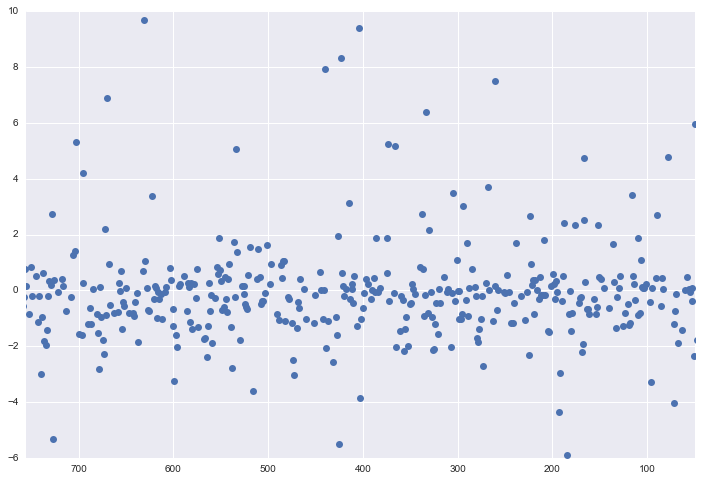

In [243]:
results.resid.plot(style='o', figsize=(12,8))

In [265]:
### ONLY MOVIES 2000 and later

y, X = patsy.dmatrices('nominations ~ I(budget_millions**3) + release_month_October + release_month_December + I(revenue) + I(runtime**4) + I(genre_nominations**3) + I((count_in_genre * genre_nominations)**2) + I(distributor_nominations**3) + I((distributor_nominations * count_in_distributor**3)**2)', data=new_movies_df, return_type = 'dataframe')


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=15)
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            nominations   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     39.93
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           8.36e-49
Time:                        17:16:45   Log-Likelihood:                -675.72
No. Observations:                 364   AIC:                             1371.
Df Residuals:                     354   BIC:                             1410.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        -1.0467      0.193     -5.421      0.000        -1.426    -0.667
I(budget_millions ** 3)                                       -6.005e-08   2.84e-08     -2.115      0.035     -1.16e-07 -4.21e-09
release_month_October                                             2.0031      0.395      5.077      0.000         1.227     2.779
release_month_December                                            1.2746      0.275      4.640      0.000         0.734     1.815
I(revenue)                                                     3.953e-09    9.8e-10      4.034      0.000      2.03e-09  5.88e-09
I(runtime ** 4)                                                3.261e-09   6.08e-10      5.359      0.000      2.06e-09  4.46e-09
I(genre_nominations ** 3)                                         0.0115      0.001      7.792      0.000         0.009     0.014
I((count_in_genre * genre_nominations) ** 2)                   5.883e-05   1.67e-05      3.517      0.000      2.59e-05  9.17e-05
I(distributor_nominations ** 3)                                   0.0141      0.003      5.456      0.000         0.009     0.019
I((distributor_nominations * count_in_distributor ** 3) ** 2)  1.502e-14    6.5e-15      2.309      0.022      2.23e-15  2.78e-14
==============================================================================
Omnibus:                      164.727   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              964.314
Skew:                           1.834   Prob(JB):                    4.00e-210
Kurtosis:                      10.080   Cond. No.                     9.25e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.25e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

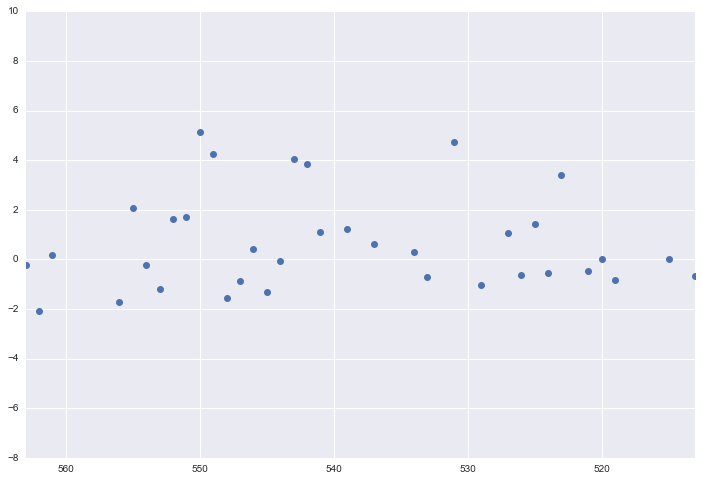

In [266]:
results.resid.plot(style='o', figsize=(12,8))

In [124]:
#results.resid.plot(style='o', figsize=(12,8))
from sklearn.metrics import r2_score, mean_squared_error

  
y_pred = np.zeros(y_train.shape)
y_pred[:] = np.mean(y_train)
#print(y_pred)
mean_squared_error(y_train, y_pred)

5.7714473785733578

In [187]:
X = whole_data_df[refined_x_columns]
y = whole_data_df['nominations']
x_list = '\") + Q(\"'.join(refined_x_columns)
#y, X = patsy.dmatrices("nominations ~ Q('{}')".format(x_list), data=whole_data_df, return_type = 'dataframe')
y, X = patsy.dmatrices('nominations ~ Q("{}")'.format(x_list), data=whole_data_df, return_type = 'dataframe')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.8)
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            nominations   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     14.87
Date:                Tue, 04 Oct 2016   Prob (F-statistic):           4.82e-66
Time:                        17:49:33   Log-Likelihood:                -1298.7
No. Observations:                 644   AIC:                             2679.
Df Residuals:                     603   BIC:                             2862.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -3.2551      0.436     -7.471      0.000        -4.111    -2.400
Q("budget_millions")                           -0.0052      0.002     -3.031      0.003        -0.009    -0.002
Q("revenue")                                 8.604e-09   1.02e-09      8.474      0.000      6.61e-09  1.06e-08
Q("runtime")                                    0.0328      0.004      7.561      0.000         0.024     0.041
Q("distributor_AVCO Embassy")               -1.421e-15   9.72e-16     -1.462      0.144     -3.33e-15  4.88e-16
Q("distributor_Artisan")                     1.754e-15   1.66e-15      1.058      0.291      -1.5e-15  5.01e-15
Q("distributor_Associated Film Dist.")      -7.404e-15   1.92e-15     -3.852      0.000     -1.12e-14 -3.63e-15
Q("distributor_Columbia")                       1.9909      0.782      2.547      0.011         0.455     3.526
Q("distributor_Dimension Films")               -1.2424      0.959     -1.296      0.195        -3.125     0.640
Q("distributor_DreamWorks")                     0.7921      0.536      1.477      0.140        -0.261     1.845
Q("distributor_Focus Features")                 1.8792      1.141      1.647      0.100        -0.362     4.121
Q("distributor_Fox Searchlight")                4.0379      1.108      3.646      0.000         1.863     6.213
Q("distributor_IFC")                            0.6095      1.966      0.310      0.757        -3.251     4.470
Q("distributor_IMAX")                        5.526e-15   3.07e-15      1.798      0.073     -5.11e-16  1.16e-14
Q("distributor_MacGillivray Freeman Films") -3.795e-16   2.37e-15     -0.160      0.873     -5.03e-15  4.27e-15
Q("distributor_Miramax")                        3.4821      0.731      4.763      0.000         2.046     4.918
Q("distributor_Newmarket")                     -9.2980      2.695     -3.450      0.001       -14.591    -4.005
Q("distributor_Open Road Films")            -1.571e-15   2.11e-15     -0.743      0.458     -5.72e-15  2.58e-15
Q("distributor_Orion Pictures")                 4.2397      1.381      3.071      0.002         1.528     6.951
Q("distributor_Overture Films")                -1.3994      1.913     -0.732      0.465        -5.156     2.357
Q("distributor_RKO")                         5.321e-16   7.37e-16      0.722      0.470     -9.15e-16  1.98e-15
Q("distributor_Sony Classics")              -4.258e-15   1.83e-15     -2.329      0.020     -7.85e-15 -6.68e-16
Q("distributor_TriStar")                        0.8956      0.728      1.231      0.219        -0.534     2.325
Q("distributor_Warner Independent")          3.784e-15    1.8e-15      2.102      0.036      2.48e-16  7.32e-15
Q("genre_Action")                              -0.9303     

In [188]:
refined_x_columns = [
                     "budget_millions",
                     "revenue",
                     "runtime",
                     #"distributor_AVCO Embassy",
                     #"distributor_Artisan",
                     "distributor_Associated Film Dist.",
                     "distributor_Columbia",
                     #"distributor_Dimension Films",
                     "distributor_DreamWorks",
                     "distributor_Focus Features",
                     "distributor_Fox Searchlight",
                     #"distributor_IFC",
                     "distributor_IMAX",
                     #"distributor_MacGillivray Freeman Films",
                     "distributor_Miramax",
                     "distributor_Newmarket",
                     #"distributor_Open Road Films",
                     "distributor_Orion Pictures",
                     #"distributor_Overture Films",
                     #"distributor_RKO",
                     "distributor_Sony Classics",
                     #"distributor_TriStar",
                     "distributor_Warner Independent",
                     "genre_Action",
                     "genre_Action / Adventure",
                     "genre_Adventure Comedy",
                     #"genre_Comedy",
                     "genre_Comedy Thriller",
                     #"genre_Concert",
                     #"genre_Crime Comedy",
                     "genre_Drama",
                     #"genre_Fantasy Drama",
                     #"genre_Foreign / Action",
                     "genre_Historical Drama",
                     #"genre_IMAX",
                     #"genre_Music Drama",
                     "genre_Period Comedy",
                     "genre_Period Drama",
                     #"genre_Romantic Comedy",
                     #"genre_Sports Drama",
                     "genre_War",
                     "genre_War Drama",
                     "genre_Western",
                     "release_month_October",
                     #"release_month_November",
                     "release_month_December",
                     #"release_month_January",
                     "release_month_February",
                     "release_month_March",
                     "release_month_April",
                     "release_month_May",
                     #"release_month_June",
                     #"release_month_July",
                     "release_month_August",
                     #"release_month_September"
                    ]

In [195]:
X = whole_data_df[refined_x_columns]
y = whole_data_df['nominations']
x_list = '\") + Q(\"'.join(refined_x_columns)
#y, X = patsy.dmatrices("nominations ~ Q('{}')".format(x_list), data=whole_data_df, return_type = 'dataframe')
y, X = patsy.dmatrices('nominations ~ Q("{}")'.format(x_list), data=whole_data_df, return_type = 'dataframe')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.8)
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            nominations   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     5.851
Date:                Tue, 04 Oct 2016   Prob (F-statistic):           2.39e-11
Time:                        18:11:17   Log-Likelihood:                -360.25
No. Observations:                 184   AIC:                             762.5
Df Residuals:                     163   BIC:                             830.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.8329      0.910     -4.212      0.000        -5.630    -2.036
Q("budget_millions")                      -0.0034      0.003     -1.091      0.277        -0.010     0.003
Q("revenue")                            8.864e-09   2.02e-09      4.390      0.000      4.88e-09  1.29e-08
Q("runtime")                               0.0327      0.008      3.940      0.000         0.016     0.049
Q("distributor_Associated Film Dist.")  5.213e-10   5.85e-10      0.890      0.375     -6.35e-10  1.68e-09
Q("distributor_Columbia")                  2.7275      0.950      2.872      0.005         0.852     4.603
Q("distributor_Focus Features")         -1.98e-11   2.22e-11     -0.890      0.375     -6.37e-11  2.41e-11
Q("distributor_Fox Searchlight")        1.198e-11   1.35e-11      0.890      0.375     -1.46e-11  3.86e-11
Q("distributor_IMAX")                   9.175e-11   1.03e-10      0.890      0.375     -1.12e-10  2.95e-10
Q("distributor_Miramax")                   1.4033      1.173      1.196      0.233        -0.913     3.720
Q("distributor_Newmarket")                -0.1214      0.991     -0.123      0.903        -2.077     1.835
Q("distributor_Orion Pictures")         4.749e-11   5.33e-11      0.890      0.375     -5.78e-11  1.53e-10
Q("distributor_Sony Classics")         -1.858e-12   2.09e-12     -0.891      0.375     -5.98e-12  2.26e-12
Q("distributor_Warner Independent")    -2.447e-12   2.75e-12     -0.890      0.375     -7.87e-12  2.98e-12
Q("genre_Action")                         -1.3740      1.161     -1.183      0.238        -3.667     0.919
Q("genre_Action / Adventure")             -1.0058      0.545     -1.846      0.067        -2.082     0.070
Q("genre_Adventure Comedy")             4.963e-14   5.57e-14      0.891      0.374     -6.04e-14   1.6e-13
Q("genre_Comedy Thriller")             -8.349e-14   9.33e-14     -0.895      0.372     -2.68e-13  1.01e-13
Q("genre_Drama")                           1.1157      0.635      1.757      0.081        -0.138     2.369
Q("genre_Historical Drama")               -0.1214      0.991     -0.123      0.903        -2.077     1.835
Q("genre_Period Comedy")                        0          0        nan        nan             0         0
Q("genre_Period Drama")                   -1.3132      1.908     -0.688      0.492        -5.081     2.455
Q("genre_War")                            -0.1368      1.408     -0.097      0.923        -2.917     2.644
Q("genre_War Drama")                       0.3410      1.873      0.182      0.856        -3.358     4.040
Q("genre_Western")                         1.3473      1.897      0.710      0.479        -2.398     5.093
Q("release_month_October")                 2.2044      0.710      3.104      0.002     

In [121]:
movies_df.distributor.value_counts()

Warner Bros.                       168
Buena Vista                        167
Universal                          153
Paramount                          151
Fox                                149
Sony / Columbia                    115
New Line                            29
Paramount (DreamWorks)              26
Warner Bros. (New Line)             26
MGM                                 26
DreamWorks                          24
Miramax                             19
Columbia                            17
TriStar                             14
Lionsgate                           11
Sony (Revolution)                   11
Sony / Screen Gems                  10
Disney                              10
United Artists                       7
Dimension Films                      7
Lionsgate/Summit                     7
Weinstein Company                    6
Summit Entertainment                 6
Fox Searchlight                      5
Relativity                           5
Orion Pictures           

In [ ]:
# EXAMPLE: iterate through files in a directory
'''
for filename in os.listdir(directory):
    if filename.endswith(".asm") or filename.endswith(".py"): 
        # print(os.path.join(directory, filename))
        continue
    else:
        continue
'''

#soup.find(class_='mp_box_content').find_all('td'))

In [126]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import randint as sp_randint

In [148]:
#df = pd.read_csv("Pair_dataset.csv", index_col=0)
X,y = new_means_df[['release_month_October','release_month_November','release_month_December','revenue','runtime','count_in_genre','genre_nominations','distributor_nominations','count_in_distributor']],new_means_df['nominations']
#y, X = 
#y, X = patsy.dmatrices('nominations ~ budget_millions + release_month_October + release_month_November + release_month_December + revenue + runtime + count_in_genre + genre_nominations + distributor_nominations + count_in_distributor', data=new_means_df, return_type = 'dataframe')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [251]:
# specify parameters and distributions to sample from
param_dist = {"n_estimators": range(100,1000,50),
              "max_depth": range(3,6),
              "max_features": range(3,7)}              
# build a classifier
clf = RandomForestRegressor()
n_iter_search = 10
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search)
#random_search.feature_importances_
random_search.fit(X_train, y_train)

# y_pred2=random_search.predict(X_test)
# metrics.r2_score(y_test, y_pred2)

/Users/zach/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/zach/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/zach/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/zach/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarni

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': range(100, 1000, 50), 'max_depth': range(3, 6), 'max_features': range(3, 7)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [253]:
random_search.best_score_

0.36827804930299046

In [254]:
random_search.best_params_

{'max_depth': 5, 'max_features': 3, 'n_estimators': 600}